In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# HR Analytics and Classification

# Overview Dataset

In [2]:
data_dir = 'C:/Users/baoth/Desktop/Learnmore/DS/machine_learning_PS/data/HR_comma_sep.csv'

In [3]:
df=pd.read_csv(data_dir)
print('Shape of data: ',df.shape)

Shape of data:  (14999, 10)


The provided data consists of about 15k observations with 10 columns.
### First few observations

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Features of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Almost type of features is Numeric columns, excepted Department and Salary is object type.
### Check null value 

In [6]:
df[df.isnull().any(axis=1)].count()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

All of variables is not null values.
### Feature Statistics Summary
Below table provides the statistical details for each numeric columns (except Department, Salary, Left, Work_accident,promotion_last_5years).

In [7]:
df[['satisfaction_level','last_evaluation','number_project',
'average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [8]:
print('Feature Work accident count: ',df['Work_accident'].count())
print('Feature Work accident value: ')
df['Work_accident'].value_counts().to_frame()

Feature Work accident count:  14999
Feature Work accident value: 


,Work_accident
0,12830
1,2169


* **0**: worker does not get accident in work.
* **1**: worker get accident in work.

In [9]:
print('Feature promotion_last_5years count: ',df['promotion_last_5years'].count())
print('Feature promotion_last_5years value: ')
df['promotion_last_5years'].value_counts().to_frame()

Feature promotion_last_5years count:  14999
Feature promotion_last_5years value: 


,promotion_last_5years
0,14680
1,319


* **0**: worker does not promote in work in last 5 years.
* **1**: worker promote in work in last 5 years.

In [11]:
print('Feature Department count: ',df['Department'].count())
print('Feature Department value: ')
df['Department'].value_counts().to_frame()

Feature Department count:  14999
Feature Department value: 


,Department
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


In [12]:
print('Feature salary count: ',df['salary'].count())
print('Feature salary value: ')
df['salary'].value_counts().to_frame()

Feature salary count:  14999
Feature salary value: 


,salary
low,7316
medium,6446
high,1237


In [13]:
print('Label count: ',df['left'].count())
print('Label value: ')
df['left'].value_counts().to_frame()

Label count:  14999
Label value: 


,left
0,11428
1,3571


* **0**: worker does not leave out organization.
* **1**: worker leave out organization.

# Data visualization and Analytics

## Worker Left VS Numeric Features
### Workers Left VS satisfaction_level

Statistics of satisfaction_level


satisfaction_level                                                  
                  count      mean       std   min   25%   50%   75%   max
left                                                                     
0               11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00
1                3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92

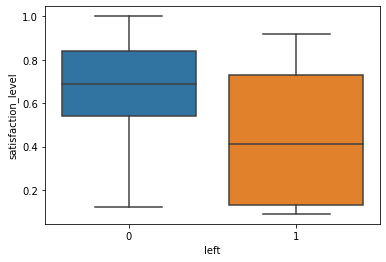

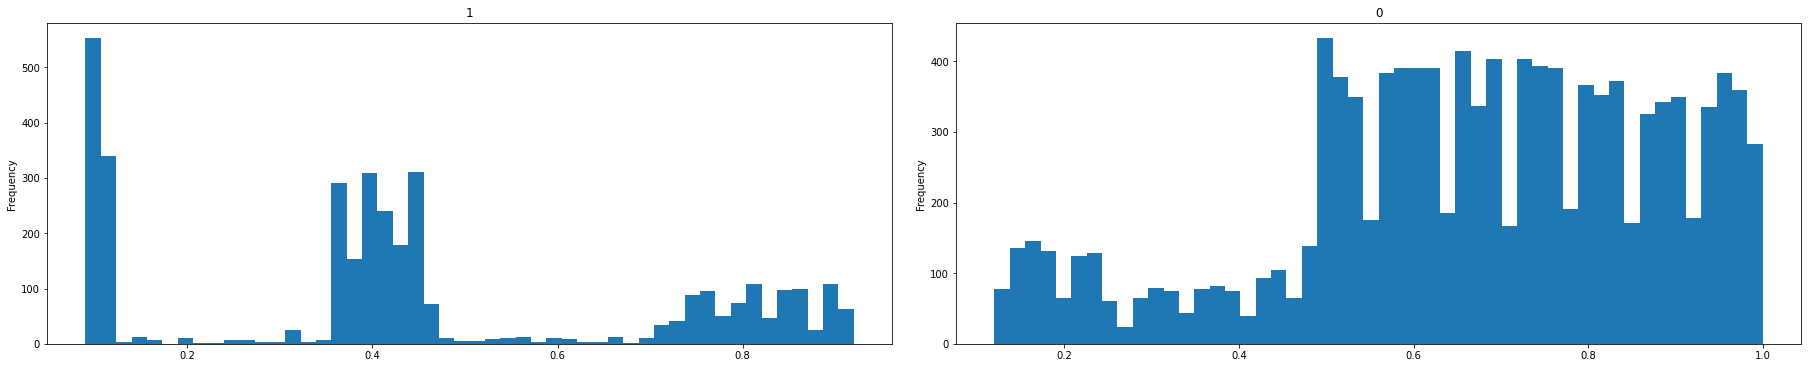

In [14]:
data_s_left = df[['left','satisfaction_level']]
sta = data_s_left.groupby('left').describe()
print('Statistics of satisfaction_level')
display(sta)
sns.boxplot(x='left',y='satisfaction_level',data=data_s_left)
fig, axs = plt.subplots(figsize=(25,5),nrows=1,ncols=2,constrained_layout=True)
index_u = data_s_left['left'].unique()
for i,k in enumerate(index_u):
    data_m = data_s_left[data_s_left['left'] == k]
    data_m['satisfaction_level'].plot(kind='hist',subplots=True,bins=50,ax=axs[i])
    axs[i].set_title(k)

+ It's easy to see that the number of workers those whose leave from work is highest at low satisfication level and it's a inverse trend in the satisfication worker, there satisfication level is high at 0.5 to 1.0.
+ The average satisfaction level of left worker is 0.44 and while counter part is 0.67.

### Worker Left VS last_evaluation

last_evaluation                                                 
               count      mean       std   min   25%   50%   75%  max
left                                                                 
0            11428.0  0.715473  0.162005  0.36  0.58  0.71  0.85  1.0
1             3571.0  0.718113  0.197673  0.45  0.52  0.79  0.90  1.0

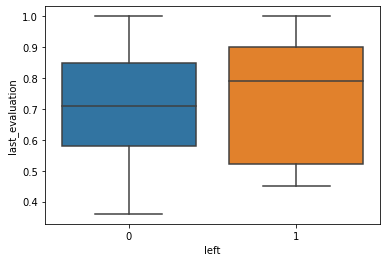

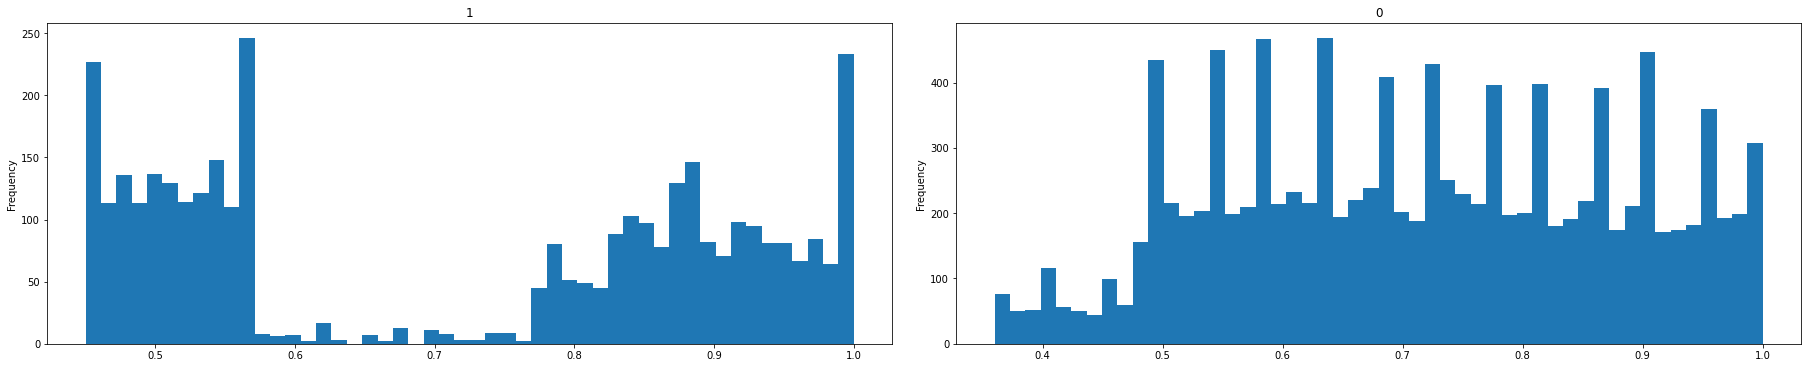

In [15]:
data_eval_left = df[['left','last_evaluation']]
sta = data_eval_left.groupby('left').describe()
display(sta)
sns.boxplot(x='left',y='last_evaluation',data=data_eval_left)
fig, axs = plt.subplots(figsize=(25,5),nrows=1,ncols=2,constrained_layout=True)
index_u = data_eval_left['left'].unique()
for i,k in enumerate(index_u):
    data_m = data_eval_left[data_eval_left['left'] == k]
    data_m['last_evaluation'].plot(kind='hist',subplots=True,bins=50,ax=axs[i])
    axs[i].set_title(k)

### Worker Left VS number_project

number_project                                             
              count      mean       std  min  25%  50%  75%  max
left                                                            
0           11428.0  3.786664  0.979884  2.0  3.0  4.0  4.0  6.0
1            3571.0  3.855503  1.818165  2.0  2.0  4.0  6.0  7.0

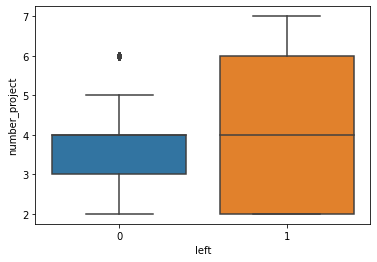

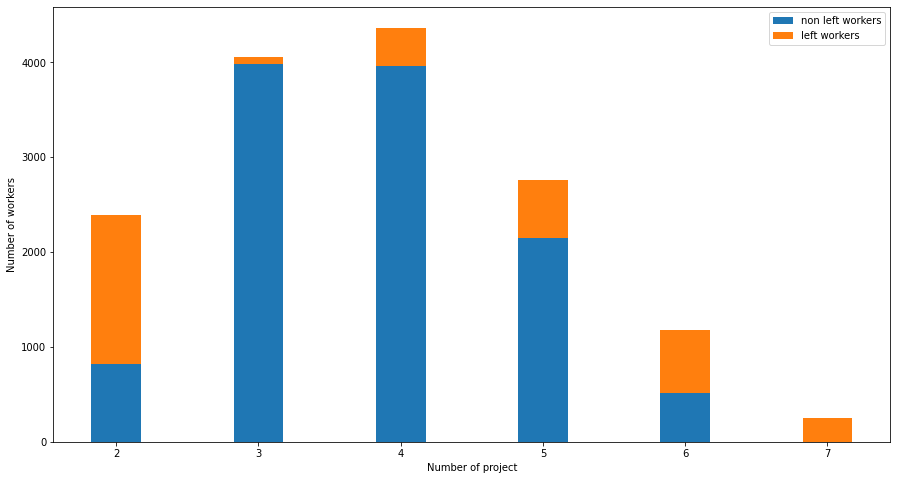

In [16]:
data_npr_left = df[['left','number_project']]
sta = data_npr_left.groupby('left').describe()
display(sta)
sns.boxplot(x='left',y='number_project',data=data_npr_left)
data_npr_left = data_npr_left.groupby(['left','number_project'])['left'].count()
index_u = data_npr_left.index.get_level_values(1).unique()
fig, ax = plt.subplots(figsize=(15,8))
width = 0.35
_0 = data_npr_left[0].values.tolist()
_0.append(0)
_1 = data_npr_left[1].values.tolist()
ax.bar(index_u, _0 , width, label='non left workers')
ax.bar(index_u, _1 , width, bottom=_0 , label='left workers')
ax.set_ylabel('Number of workers')
ax.set_xlabel('Number of project')
ax.legend()
plt.show()

### Worker Left VS average_montly_hours

average_montly_hours                                                     \
                    count        mean        std    min    25%    50%    75%   
left                                                                           
0                 11428.0  199.060203  45.682731   96.0  162.0  198.0  238.0   
1                  3571.0  207.419210  61.202825  126.0  146.0  224.0  262.0   

             
        max  
left         
0     287.0  
1     310.0

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

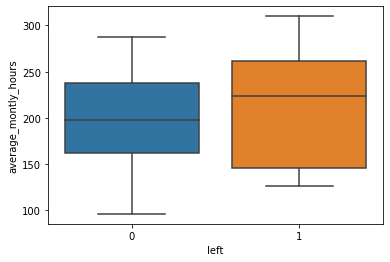

In [17]:
data_amh_left = df[['left','average_montly_hours']]
sta = data_amh_left.groupby('left').describe()
display(sta)
sns.boxplot(x='left',y='average_montly_hours',data=data_amh_left)

### Worker Left VS time_spend_company

time_spend_company                                              
                  count      mean       std  min  25%  50%  75%   max
left                                                                 
0               11428.0  3.380032  1.562348  2.0  2.0  3.0  4.0  10.0
1                3571.0  3.876505  0.977698  2.0  3.0  4.0  5.0   6.0

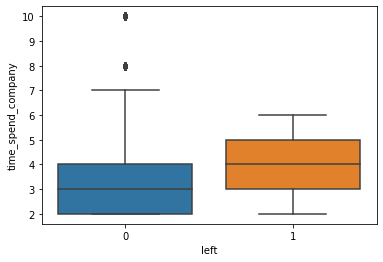

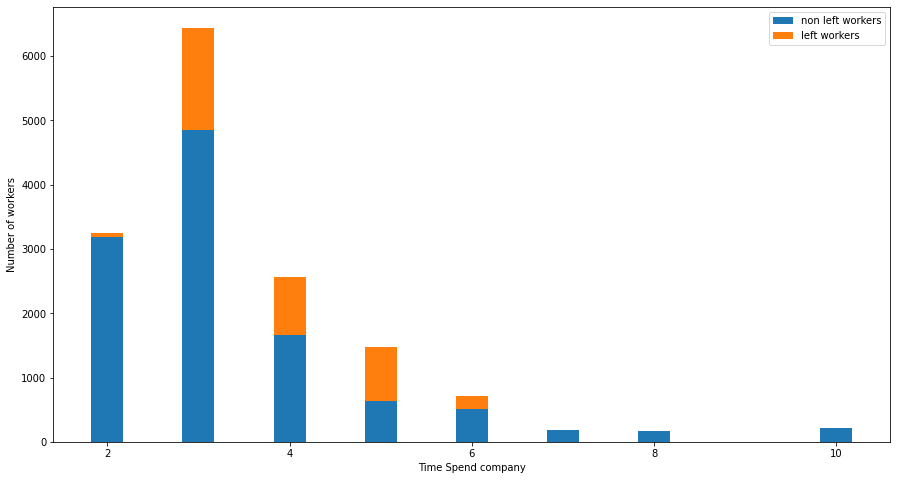

In [18]:
data_tsc_left = df[['left','time_spend_company']]
sta = data_tsc_left.groupby('left').describe()
display(sta)
sns.boxplot(x='left',y='time_spend_company',data=data_tsc_left)
data_tsc_left = data_tsc_left.groupby(['left','time_spend_company'])['left'].count()
index_u = data_tsc_left.index.get_level_values(1).unique()
fig, ax = plt.subplots(figsize=(15,8))
width = 0.35
_0 = data_tsc_left[0].values.tolist()
_1 = data_tsc_left[1].values.tolist()
for i in range(len(_1),len(_0)):
    _1.append(0)
ax.bar(index_u, _0 , width, label='non left workers')
ax.bar(index_u, _1 , width, bottom=_0 , label='left workers')
ax.set_ylabel('Number of workers')
ax.set_xlabel('Time Spend company')
ax.legend()
plt.show()

## Worker Left VS Categorical data
### Worker Left VS Work_accident

<AxesSubplot:xlabel='Work_accident'>

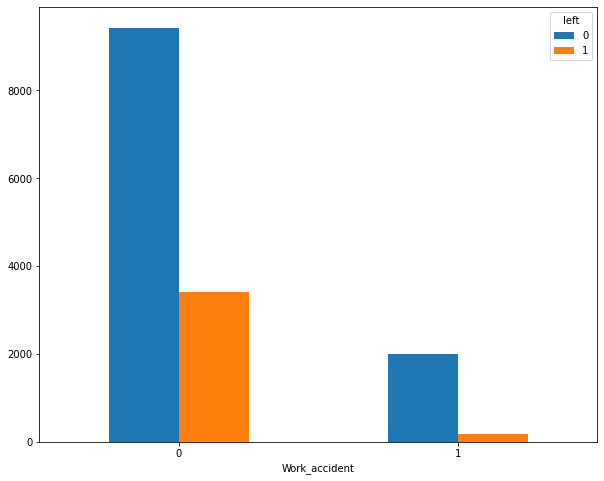

In [77]:
data_wc_left = pd.crosstab(df['Work_accident'],df['left'])
data_wc_left.plot(kind='bar',rot=0,figsize=(10,8))

### Work Left VS promotion_last_5years

<AxesSubplot:xlabel='promotion_last_5years'>

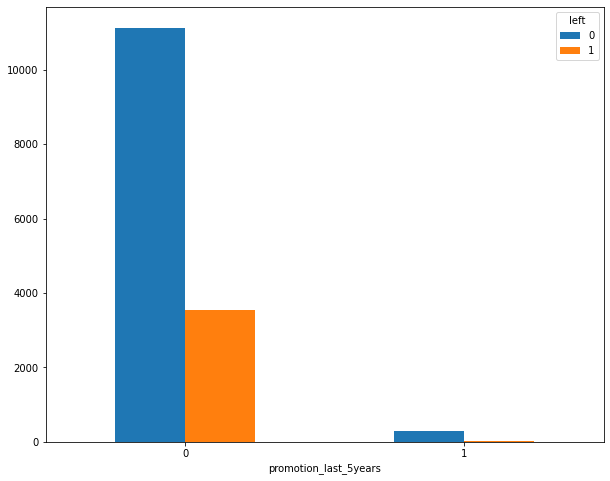

In [78]:
data_p5y_left = pd.crosstab(df['promotion_last_5years'],df['left'])
data_p5y_left.plot(kind='bar',rot=0,figsize=(10,8))

### Worker Left VS Deparment

<AxesSubplot:xlabel='Department'>

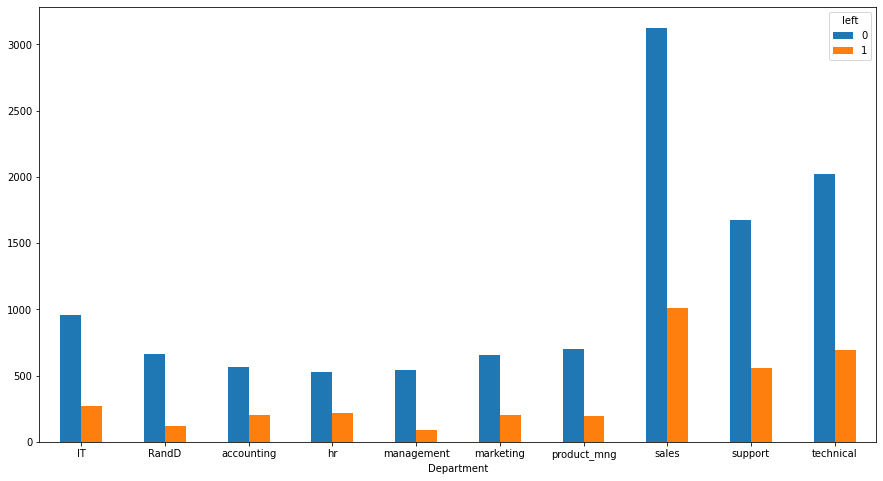

In [80]:
data_d_left = pd.crosstab(df['Department'],df['left'])
data_d_left.plot(kind='bar',rot=0,figsize=(15,8))

### Workers Left VS Salary

<AxesSubplot:xlabel='salary'>

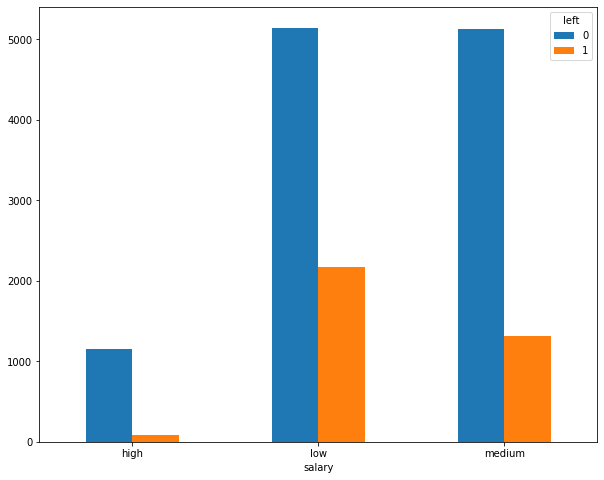

In [81]:
data_s_left = pd.crosstab(df['salary'],df['left'])
data_s_left.plot(kind='bar',rot=0,figsize=(10,8))

# MODELLING

## Correlation heatmap

<AxesSubplot:>

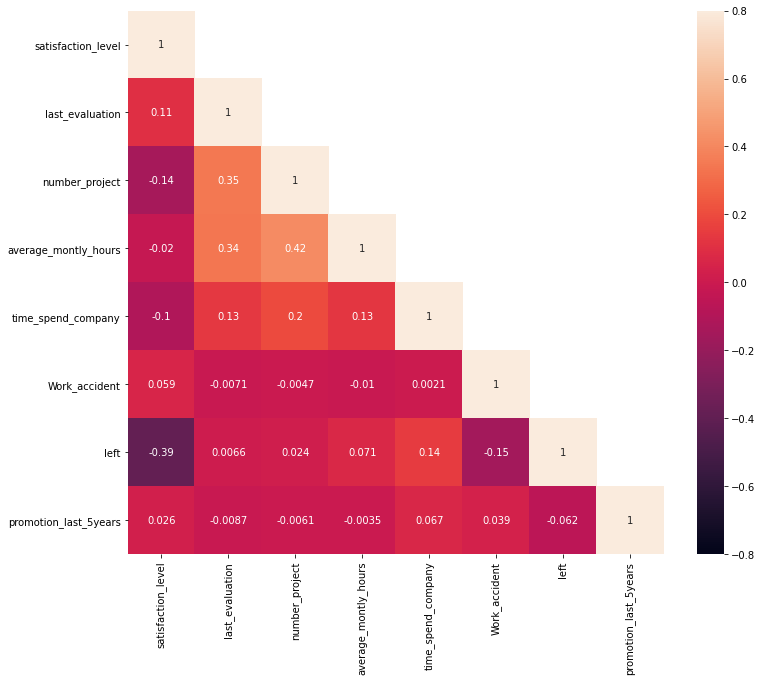

In [20]:
df_corr = df.corr()
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_corr,mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8)

## Feature Engineering

In [4]:
df = pd.get_dummies(df,columns=['salary'])
df = pd.get_dummies(df,columns=['Department'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary_high             14999 non-null  uint8  
 9   salary_low              14999 non-null  uint8  
 10  salary_medium           14999 non-null  uint8  
 11  Department_IT           14999 non-null  uint8  
 12  Department_RandD        14999 non-null  uint8  
 13  Department_accounting   14999 non-null  uint8  
 14  Department_hr           14999 non-null

## Classification Modelling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

### Data and Fuction Definition

In [23]:
features = df.drop('left',axis=1)
target = df['left']
def get_X_y(features,target):
    sc = StandardScaler()
    #features = sc.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = get_X_y(features,target)

In [25]:
print('Training dataset size: ')
X_train.shape,y_train.shape

Training dataset size: 


((11999, 20), (11999,))

In [26]:
print('Testing dataset size: ')
X_test.shape,y_test.shape

Testing dataset size: 


((3000, 20), (3000,))

### Features Scaling

In [28]:
scaler = StandardScaler()
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()
fit_features = ['number_project','average_montly_hours','time_spend_company']
features_fit = X_train_scale[fit_features]
scaler_fit_feature = scaler.fit(features_fit)
X_train_scale[fit_features] = scaler_fit_feature.transform(X_train_scale[fit_features])
X_test_scale[fit_features] = scaler_fit_feature.transform(X_test_scale[fit_features])

### Helper functions

In [43]:
summary_col = ['Classifier','Accuracy','Precision','Recall','F1 Score','ROC_AUC']
summary = pd.DataFrame(columns=summary_col)
def summary_score(model_name,y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    #num_acc = accuracy_score(y_test,y_pred,normalize=False)

    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_score = roc_auc_score(y_test,y_pred)
    #print('test data count',len(y_test))
    print('Model: ',model_name)
    print('--Result in test data set--')
    print('Accuracy score: ', acc)
    print('Precision score', prec)
    print('Recall score: ',recall)
    print('F1 score: ', f1)
    print('ROC_AUC: ', roc_score)
    #print('acc_count',num_acc)
    sum_entry = pd.DataFrame([[model_name,acc*100,prec*100,recall*100,f1*100,roc_score*100]],columns=summary_col)
    return sum_entry 

In [30]:
def get_summary_parameter(grid_search, hyperparam):
    nof_param = 1
    for k in hyperparam.keys():
        nof_param = nof_param*len(hyperparam[k])
    for i in range(nof_param):
        print('Parameter: ',grid_search.cv_results_['params'][i])
        print('Mean Test score: ',grid_search.cv_results_['mean_test_score'][i])
        print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

### **Logistic Regression**

In [44]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
name = logistic_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  LogisticRegression
--Result in test data set--
Accuracy score:  0.7953333333333333
Precision score 0.6311881188118812
Recall score:  0.3541666666666667
F1 score:  0.4537366548042705
ROC_AUC:  0.6444078947368421


### Tuning parameters

In [45]:
hyperparam = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1','l2']
}

log_par_tune = GridSearchCV(LogisticRegression(class_weight = "balanced"),hyperparam,scoring='roc_auc')
log_par_tune.fit(X_train,y_train)
print('--Summary parameter tuning--')
get_summary_parameter(log_par_tune, hyperparam)
print()
print('Best parameters set: ')
print(log_par_tune.best_params_)
y_pred = log_par_tune.predict(X_test)
name = logistic_model.__class__.__name__
print()
summary = summary.append(summary_score(str(name + '_param'),y_test,y_pred))

--Summary parameter tuning--
Parameter:  {'C': 0.01, 'penalty': 'l1'}
Mean Test score:  nan
Rank:  6
Parameter:  {'C': 0.01, 'penalty': 'l2'}
Mean Test score:  0.8228867029624436
Rank:  5
Parameter:  {'C': 0.1, 'penalty': 'l1'}
Mean Test score:  nan
Rank:  7
Parameter:  {'C': 0.1, 'penalty': 'l2'}
Mean Test score:  0.8254301223896803
Rank:  2
Parameter:  {'C': 1, 'penalty': 'l1'}
Mean Test score:  nan
Rank:  8
Parameter:  {'C': 1, 'penalty': 'l2'}
Mean Test score:  0.8253691871474673
Rank:  3
Parameter:  {'C': 10, 'penalty': 'l1'}
Mean Test score:  nan
Rank:  9
Parameter:  {'C': 10, 'penalty': 'l2'}
Mean Test score:  0.8258375932540505
Rank:  1
Parameter:  {'C': 100, 'penalty': 'l1'}
Mean Test score:  nan
Rank:  10
Parameter:  {'C': 100, 'penalty': 'l2'}
Mean Test score:  0.8249410134611651
Rank:  4

Best parameters set: 
{'C': 10, 'penalty': 'l2'}

Model:  LogisticRegression_param
--Result in test data set--
Accuracy score:  0.761
Precision score 0.501323918799647
Recall score:  0.788

### Logistic with Scaling numeric features

In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scale,y_train)
y_pred = logistic_model.predict(X_test_scale)
name = logistic_model.__class__.__name__
summary = summary.append(summary_score(str(name + '_scale'),y_test,y_pred))

Model:  LogisticRegression_scale
--Result in test data set--
Accuracy score:  0.7923333333333333
Precision score 0.6234096692111959
Recall score:  0.3402777777777778
F1 score:  0.44025157232704404
ROC_AUC:  0.6376827485380117


In [47]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275


### **Naive_bayes**

In [48]:
naive_bayes_model = GaussianNB().fit(X_train,y_train)
y_pred = naive_bayes_model.predict(X_test)
name = naive_bayes_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  GaussianNB
--Result in test data set--
Accuracy score:  0.652
Precision score 0.392
Recall score:  0.8166666666666667
F1 score:  0.5297297297297296
ROC_AUC:  0.7083333333333333


In [49]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
0,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333


### **DecisionTreeClassifier**

In [50]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
name = dt_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  DecisionTreeClassifier
--Result in test data set--
Accuracy score:  0.9826666666666667
Precision score 0.9513513513513514
Recall score:  0.9777777777777777
F1 score:  0.9643835616438355
ROC_AUC:  0.9809941520467836


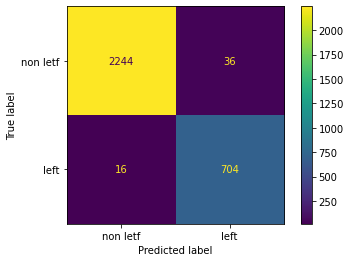

In [67]:
plot_confusion_matrix(dt_model,X_test,y_test,
                            display_labels=['non letf','left'])

In [51]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
0,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333
0,DecisionTreeClassifier,98.266667,95.135135,97.777778,96.438356,98.099415


In [56]:
print('decision tree param: ')
print(dt_model.get_params())

decision tree param: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


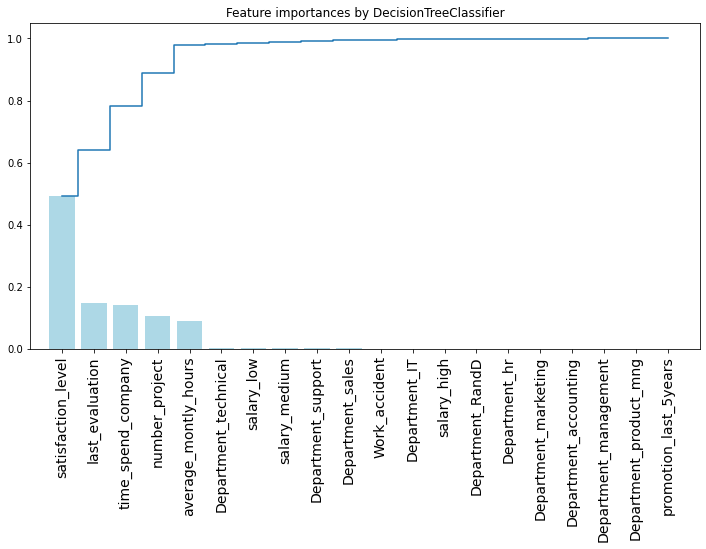

In [57]:
importances = dt_model.feature_importances_
feat_names = df.drop(['left'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

### **SVC**

In [58]:
svm_model = SVC().fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
name = svm_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  SVC
--Result in test data set--
Accuracy score:  0.7783333333333333
Precision score 1.0
Recall score:  0.0763888888888889
F1 score:  0.14193548387096777
ROC_AUC:  0.5381944444444444


In [59]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
0,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333
0,DecisionTreeClassifier,98.266667,95.135135,97.777778,96.438356,98.099415
0,SVC,77.833333,100.000000,7.638889,14.193548,53.819444


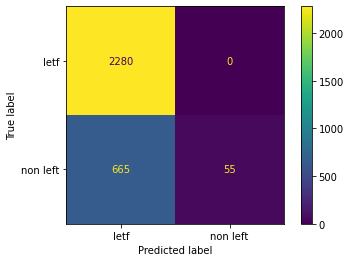

In [66]:
plot_confusion_matrix(svm_model,X_test,y_test,
                            display_labels=['non letf','left'])

### **KNeighborsClassifier**

In [68]:
KNN_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)
name = KNN_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  KNeighborsClassifier
--Result in test data set--
Accuracy score:  0.933
Precision score 0.8191881918819188
Recall score:  0.925
F1 score:  0.8688845401174168
ROC_AUC:  0.9302631578947369


In [69]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
0,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333
0,DecisionTreeClassifier,98.266667,95.135135,97.777778,96.438356,98.099415
0,SVC,77.833333,100.000000,7.638889,14.193548,53.819444
0,KNeighborsClassifier,93.300000,81.918819,92.500000,86.888454,93.026316


In [70]:
print('Model param: ')
print(KNN_model.get_params())

Model param: 
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


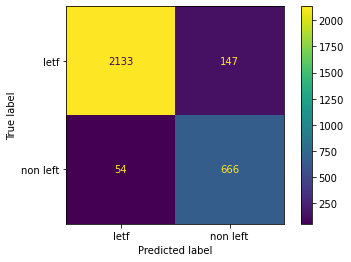

In [71]:
plot_confusion_matrix(KNN_model,X_test,y_test,
                            display_labels=['letf','non left'])

### **RandomForestClassifier**

In [72]:
RFC_model = RandomForestClassifier().fit(X_train,y_train)
y_pred = RFC_model.predict(X_test)
name = RFC_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  RandomForestClassifier
--Result in test data set--
Accuracy score:  0.9916666666666667
Precision score 0.9887482419127989
Recall score:  0.9763888888888889
F1 score:  0.9825296995108317
ROC_AUC:  0.9864400584795321


In [81]:
print('Model parameters: ')
print(RFC_model.get_params())

Model parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [73]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
0,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333
0,DecisionTreeClassifier,98.266667,95.135135,97.777778,96.438356,98.099415
0,SVC,77.833333,100.000000,7.638889,14.193548,53.819444
0,KNeighborsClassifier,93.300000,81.918819,92.500000,86.888454,93.026316
0,RandomForestClassifier,99.166667,98.874824,97.638889,98.252970,98.644006


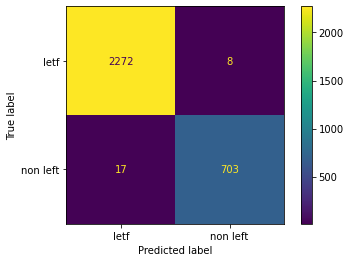

In [74]:
plot_confusion_matrix(RFC_model,X_test,y_test,
                            display_labels=['letf','non left'])

### **AdaBoostClassifier**

In [75]:
Ada_model = AdaBoostClassifier().fit(X_train,y_train)
y_pred = Ada_model.predict(X_test)
name = Ada_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  AdaBoostClassifier
--Result in test data set--
Accuracy score:  0.9603333333333334
Precision score 0.9226441631504922
Recall score:  0.9111111111111111
F1 score:  0.9168413696715585
ROC_AUC:  0.9434941520467836


In [76]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
0,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333
0,DecisionTreeClassifier,98.266667,95.135135,97.777778,96.438356,98.099415
0,SVC,77.833333,100.000000,7.638889,14.193548,53.819444
0,KNeighborsClassifier,93.300000,81.918819,92.500000,86.888454,93.026316
0,RandomForestClassifier,99.166667,98.874824,97.638889,98.252970,98.644006
0,AdaBoostClassifier,96.033333,92.264416,91.111111,91.684137,94.349415


In [82]:
print('Model parameters: ')
print(Ada_model.get_params())

Model parameters: 
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


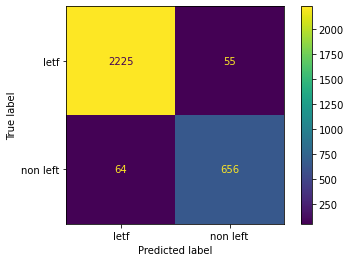

In [77]:
plot_confusion_matrix(Ada_model,X_test,y_test,
                            display_labels=['letf','non left'])

### **GradientBoostingClassifier**

In [78]:
GDB_model = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = GDB_model.predict(X_test)
name = GDB_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  GradientBoostingClassifier
--Result in test data set--
Accuracy score:  0.9746666666666667
Precision score 0.9560906515580736
Recall score:  0.9375
F1 score:  0.9467040673211782
ROC_AUC:  0.9619517543859649


In [79]:
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
0,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
0,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
0,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333
0,DecisionTreeClassifier,98.266667,95.135135,97.777778,96.438356,98.099415
0,SVC,77.833333,100.000000,7.638889,14.193548,53.819444
0,KNeighborsClassifier,93.300000,81.918819,92.500000,86.888454,93.026316
0,RandomForestClassifier,99.166667,98.874824,97.638889,98.252970,98.644006
0,AdaBoostClassifier,96.033333,92.264416,91.111111,91.684137,94.349415
0,GradientBoostingClassifier,97.466667,95.609065,93.750000,94.670407,96.195175


In [83]:
print('Model parameters: ')
print(GDB_model.get_params())

Model parameters: 
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


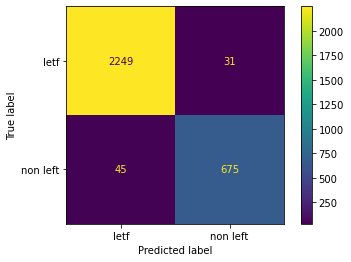

In [80]:
plot_confusion_matrix(GDB_model,X_test,y_test,
                            display_labels=['letf','non left'])

### Summary models

In [90]:
#summary = summary.drop(['level_0','index'],axis=1)
summary

,Classifier,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,RandomForestClassifier,99.166667,98.874824,97.638889,98.252970,98.644006
1,DecisionTreeClassifier,98.266667,95.135135,97.777778,96.438356,98.099415
2,GradientBoostingClassifier,97.466667,95.609065,93.750000,94.670407,96.195175
3,AdaBoostClassifier,96.033333,92.264416,91.111111,91.684137,94.349415
4,KNeighborsClassifier,93.300000,81.918819,92.500000,86.888454,93.026316
5,LogisticRegression,79.533333,63.118812,35.416667,45.373665,64.440789
6,LogisticRegression_scale,79.233333,62.340967,34.027778,44.025157,63.768275
7,SVC,77.833333,100.000000,7.638889,14.193548,53.819444
8,LogisticRegression_param,76.100000,50.132392,78.888889,61.305990,77.054094
9,GaussianNB,65.200000,39.200000,81.666667,52.972973,70.833333
